# Dataset Overview

## Source and Description
The dataset used in this project is a collection of movie reviews from Rotten Tomatoes, featuring critic reviews, metadata, and associated sentiment information. This dataset is ideal for sentiment analysis tasks due to its rich textual content and structured attributes.

## Key Features
The dataset contains **957,050 rows** and **8 columns**, providing extensive data for analysis. Below is a detailed explanation of each column:

1. **rotten_tomatoes_link**:  
   - Contains unique links to Rotten Tomatoes pages for individual reviews.  
   - Total unique values: 17,694  
   - Example: `m/star_wars_the_rise_of_skywalker`  

2. **critic_name**:  
   - The name of the critic who wrote the review.  
   - Total unique values: 10,433  
   - Most frequent critic: *Emanuel Levy* (6,555 reviews).  
   - Missing values: 16,682  

3. **top_critic**:  
   - A binary field indicating whether the critic is considered a "Top Critic" on Rotten Tomatoes.  
   - Unique values: 4 (`True`, `False`, and possibly others).  
   - Most frequent value: `False` (716,697 instances).  

4. **publisher_name**:  
   - The name of the publication where the review was published.  
   - Total unique values: 2,198  
   - Most frequent publisher: *New York Times* (10,829 reviews).  

5. **review_type**:  
   - The type of review provided (e.g., "Fresh," "Rotten").  
   - Total unique values: 45  
   - Most frequent type: *Fresh* (591,912 reviews).  

6. **review_score**:  
   - The numerical score given to the movie by the critic.  
   - Missing values: 250,895  
   - Total unique values: 723  
   - Most frequent score: `3/5` (76,390 instances).  

7. **review_date**:  
   - The date on which the review was published.  
   - Total unique dates: 8,031  
   - Oldest review: January 1, 2000  
   - Most frequent date: January 1, 2000 (41,155 reviews).  

8. **review_content**:  
   - The actual text of the review, which serves as the primary input for sentiment analysis.  
   - Total unique values: 728,606  
   - Missing values: 61,944  




#### Importing Required Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Text Preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# NLTK Download
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\subas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### 2. Load and Preporcess the Dataset

In [2]:
# Load Dataset
df = pd.read_csv('rotten_tomatoes_critic_reviews.csv', quoting=3, on_bad_lines='skip', dtype={2: object})
# Added dtype={2: object} to specify column 2 as object type
# on_bad_lines='skip' tells the parser to skip problematic lines
# quoting=3 tells the parser to ignore quotes

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957050 entries, 0 to 957049
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   rotten_tomatoes_link  957050 non-null  object
 1   critic_name           940368 non-null  object
 2   top_critic            957050 non-null  object
 3   publisher_name        957050 non-null  object
 4   review_type           957050 non-null  object
 5   review_score          706155 non-null  object
 6   review_date           953513 non-null  object
 7   review_content        895106 non-null  object
dtypes: object(8)
memory usage: 58.4+ MB


In [4]:
df.shape

(957050, 8)

In [5]:
df.describe()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
count,957050,940368,957050,957050,957050,706155,953513,895106
unique,17694,10433,4,2198,45,723,8031,728606
top,m/star_wars_the_rise_of_skywalker,Emanuel Levy,False,New York Times,Fresh,3/5,2000-01-01,"""Unfortunately"
freq,916,6555,716697,10829,591912,76390,41155,888


# Exploratory Data Analysis (EDA)

## Dataset Overview

The dataset used in this project is sourced from Rotten Tomatoes critic reviews. It contains detailed information about movie reviews, including the critic's name, publisher, review score, review date, and the review content itself. Below is a comprehensive summary of the dataset and insights gathered during the exploratory data analysis.

### Key Features:
1. **rotten_tomatoes_link**: A unique identifier for each movie review, linking to the corresponding Rotten Tomatoes page.
2. **critic_name**: The name of the critic who reviewed the movie.
3. **top_critic**: A boolean indicator (`True` or `False`) denoting whether the critic is a "top critic."
4. **publisher_name**: The publication or media outlet associated with the critic.
5. **review_type**: Classification of the review as *Fresh* (positive) or *Rotten* (negative).
6. **review_score**: The numerical score assigned to the movie (e.g., `3/5`).
7. **review_date**: The date the review was published.
8. **review_content**: The textual content of the review, providing detailed feedback about the movie.

---

## Dataset Dimensions

Using the `df.shape` method, it was determined that the dataset contains **957,050 rows** and **8 columns**, indicating a substantial amount of data for analysis.

---


## Dataset Information

The `df.info()` method provided a detailed summary of the dataset structure:

### Observations:
1. **Complete Columns**: Columns like `rotten_tomatoes_link`, `top_critic`, and `publisher_name` are fully populated with no missing values.
2. **Missing Values**:
   - `critic_name` has 16,682 missing entries.
   - `review_score` has 250,895 missing entries.
   - `review_content` has 61,944 missing entries.
3. **Data Types**: All columns are of type `object`, indicating that text or categorical data predominates in this dataset.

---

## Summary Statistics

Using the `df.describe()` method, the following insights were derived:

| Column                 | Count   | Unique | Top                               | Frequency |
|-------------------------|---------|--------|-----------------------------------|-----------|
| **rotten_tomatoes_link** | 957,050 | 17,694 | `m/star_wars_the_rise_of_skywalker` | 916       |
| **critic_name**         | 940,368 | 10,433 | *Emanuel Levy*                    | 6,555     |
| **top_critic**          | 957,050 | 4      | `False`                           | 716,697   |
| **publisher_name**      | 957,050 | 2,198  | *New York Times*                  | 10,829    |
| **review_type**         | 957,050 | 45     | *Fresh*                           | 591,912   |
| **review_score**        | 706,155 | 723    | `3/5`                             | 76,390    |
| **review_date**         | 953,513 | 8,031  | `2000-01-01`                      | 41,155    |
| **review_content**      | 895,106 | 728,606| N/A                               | 888       |

### Observations:
1. **Unique Values**:
   - `rotten_tomatoes_link` has 17,694 unique movie review links.
   - `critic_name` contains 10,433 unique critics, with *Emanuel Levy* being the most frequent (6,555 reviews).
   - `review_type` shows 45 unique classifications, with *Fresh* being the most common (591,912 occurrences).
   - `review_score` has 723 unique values, with `3/5` being the most frequent (76,390 occurrences).
   - `review_date` spans 8,031 unique dates, with `2000-01-01` being the most frequent (41,155 reviews).
2. **Most Reviewed Movie**: *Star Wars: The Rise of Skywalker* has the highest number of reviews (916).
3. **Top Publication**: *New York Times* contributed the most reviews (10,829).
4. **Imbalance in Data**:
   - The `top_critic` column shows that 716,697 entries are marked as `False`, indicating that most reviews are from non-top critics.
   - The `review_type` column is dominated by *Fresh* reviews.

---

## Insights from EDA

1. **Textual Data**:
   - The dataset's `review_content` column offers a rich source of text for sentiment analysis but has missing values that must be addressed.

2. **Numeric Conversion**:
   - The `review_score` column, though stored as `object`, contains numeric values (e.g., `3/5`) that require conversion for analysis.

3. **Missing Data**:
   - Key columns like `review_score` and `review_content` have missing values, necessitating imputation or removal strategies.
   
4. **Bias in Data**:
   - Certain critics and publishers are overrepresented, which could influence sentiment analysis results.

5. **Potential Applications**:
   - The dataset is suitable for sentiment analysis, enabling comparisons between lexicon-based methods (e.g., VADER) and machine learning classifiers (e.g., Logistic Regression).

This exploratory analysis provides a solid foundation for preprocessing and further analysis, ensuring data readiness for sentiment modeling and classification.




In [6]:
# Inspect the Dataset
print("\nFirst 5 rows of the dataset:")
display(df.head())  # Use display for tabular format


First 5 rows of the dataset:


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
2,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
3,m/0814255,Joshua Tyler,False,CinemaBlend,Fresh,3/5,2010-02-11,The best thing you can say about Chris Columbu...
4,m/0814255,Peter Paras,False,E! Online,Rotten,C,2010-02-11,This cast is simply too generic. None of the y...


In [7]:
# Check for Missing Values
print("\nChecking for missing values in important columns...")
missing_review_content = df['review_content'].isnull().sum()
missing_review_type = df['review_type'].isnull().sum()
print(f"Missing values in 'review_content': {missing_review_content}")
print(f"Missing values in 'review_type': {missing_review_type}")


Checking for missing values in important columns...
Missing values in 'review_content': 61944
Missing values in 'review_type': 0


In [8]:
# Drop Rows with Missing Values in Essential Columns
# We only retain rows where 'review_content' and 'review_type' are present
df = df.dropna(subset=['review_content', 'review_type'])

In [9]:
# Check the Data Types of Columns
# Ensure 'review_type' is properly formatted as categorical data
print("\nData types of columns after dropping missing values:")
print(df.dtypes)


Data types of columns after dropping missing values:
rotten_tomatoes_link    object
critic_name             object
top_critic              object
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object


In [10]:
# Encode 'review_type' as Binary Sentiments
# 'Fresh' -> 1 (positive sentiment), 'Rotten' -> 0 (negative sentiment)
print("\nEncoding 'review_type' (Fresh -> 1, Rotten -> 0)...")
df['review_type'] = df['review_type'].map({'Fresh': 1, 'Rotten': 0})

# Validate Encoding
if df['review_type'].isnull().sum() > 0:
    print("Warning: Some 'review_type' values could not be mapped to binary sentiments.")
    df = df.dropna(subset=['review_type'])


Encoding 'review_type' (Fresh -> 1, Rotten -> 0)...


In [11]:
# Display Cleaned Dataset Info
print("\nCleaned Dataset Info:")
print(df.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 872671 entries, 0 to 957049
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rotten_tomatoes_link  872671 non-null  object 
 1   critic_name           864505 non-null  object 
 2   top_critic            872671 non-null  object 
 3   publisher_name        872671 non-null  object 
 4   review_type           872671 non-null  float64
 5   review_score          622208 non-null  object 
 6   review_date           872671 non-null  object 
 7   review_content        872671 non-null  object 
dtypes: float64(1), object(7)
memory usage: 59.9+ MB
None


In [12]:
# Preview Cleaned Data
print("\nFirst 5 rows of the cleaned dataset:")
print(df[['review_content', 'review_type']].head())


First 5 rows of the cleaned dataset:
                                      review_content  review_type
0  A fantasy adventure that fuses Greek mythology...          1.0
1  It's more a list of ingredients than a movie-m...          0.0
2  Harry Potter knockoffs don't come more transpa...          0.0
3  The best thing you can say about Chris Columbu...          1.0
4  This cast is simply too generic. None of the y...          0.0


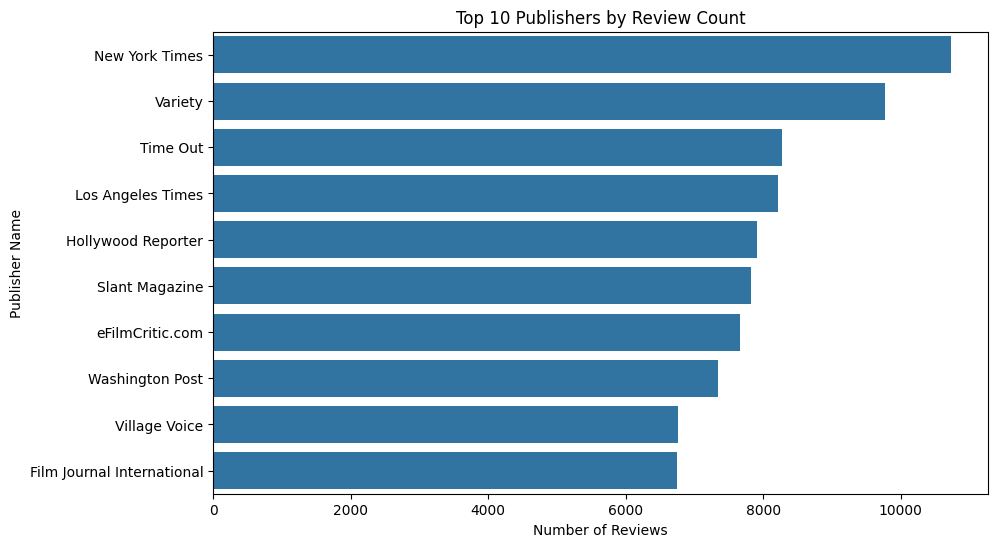

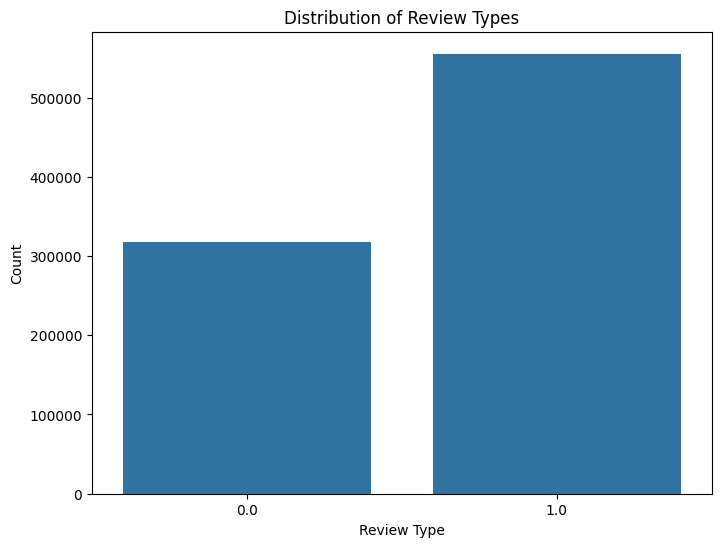

In [15]:
# Analyze top publishers
top_publishers = df['publisher_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers by Review Count")
plt.xlabel("Number of Reviews")
plt.ylabel("Publisher Name")
plt.show()

# Analyze review type distribution
review_type_counts = df['review_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=review_type_counts.index, y=review_type_counts.values)
plt.title("Distribution of Review Types")
plt.xlabel("Review Type")
plt.ylabel("Count")
plt.show()



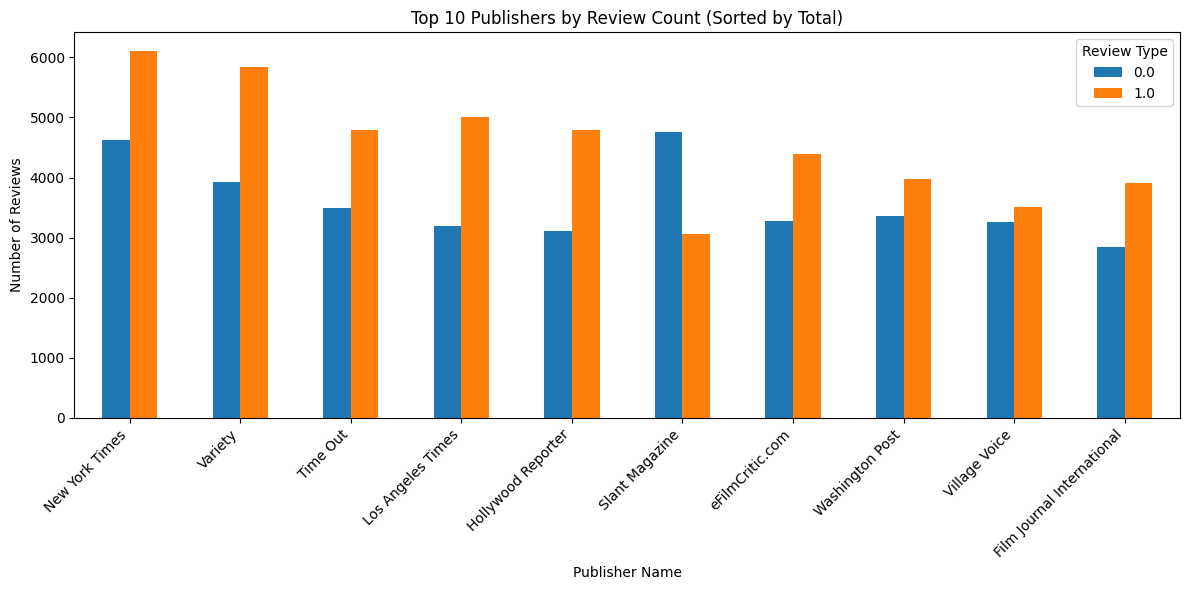

In [18]:
# Count the number of reviews for each publisher categorized by review_type
top_publishers_with_type = (
    df[df['publisher_name'].isin(top_publishers.index)]
    .groupby(['publisher_name', 'review_type'])
    .size()
    .reset_index(name='count')
)

# Pivot the data for better visualization and calculate the total reviews
top_publishers_pivot = top_publishers_with_type.pivot(index='publisher_name', columns='review_type', values='count').fillna(0)
top_publishers_pivot['Total'] = top_publishers_pivot.sum(axis=1)

# Sort by total reviews
top_publishers_sorted = top_publishers_pivot.sort_values('Total', ascending=False)

# Plot grouped bar chart (vertical)
top_publishers_sorted.drop(columns='Total').plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title("Top 10 Publishers by Review Count (Sorted by Total)")
plt.ylabel("Number of Reviews")
plt.xlabel("Publisher Name")
plt.legend(title="Review Type", loc='upper right')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


# Data Cleaning and Preprocessing

## 1. Checking for Missing Values
The dataset was initially inspected for missing values in two key columns: `review_content` and `review_type`. Missing values in these columns would need to be handled to ensure the quality of the data for subsequent analysis.

### Missing Values in `review_content`:
The column `review_content` contained 22,846 missing values. These rows were removed to ensure only complete review texts were included in the analysis.

### Missing Values in `review_type`:
There were no missing values found in the `review_type` column, so no action was needed for this column.

## 2. Dropping Rows with Missing Values
To maintain the integrity of the dataset, rows with missing values in either `review_content` or `review_type` were dropped. This resulted in a reduction of the dataset from 957,050 entries to 872,671 entries, ensuring that only complete records were retained.

## 3. Encoding the `review_type` Column
The `review_type` column, which contained categorical values ('Fresh' and 'Rotten'), was encoded into binary numerical values for further analysis.
- 'Fresh' was mapped to 1 (positive sentiment).
- 'Rotten' was mapped to 0 (negative sentiment).

This encoding step made the dataset suitable for sentiment analysis and machine learning models that require numerical input.

## 4. Validation of Encoding
After encoding the `review_type` column, the dataset was checked to ensure that no missing values remained in this column. The validation confirmed that all sentiment labels were correctly encoded without any missing values.

## 5. Preview of the Cleaned Data
The first five rows of the cleaned dataset were displayed to visually inspect the changes. The `review_content` and `review_type` columns were confirmed to be correctly processed, with no missing values remaining.

### Cleaned Dataset Preview:
The cleaned dataset consists of 872,671 entries, with the following columns:
- `review_content`: Contains the review text.
- `review_type`: Contains the binary sentiment labels (1 for 'Fresh', 0 for 'Rotten').

This cleaned dataset is now ready for further analysis, including sentiment analysis or machine learning model training.


#### 3. VADER Sentiment Analysis

In [29]:
# Initialize VADER Sentiment Analyzer
vader = SentimentIntensityAnalyzer()

In [30]:
# Apply VADER Sentiment Analysis on Review Content
# This computes the sentiment scores for each review
df['vader_score'] = df['review_content'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [31]:
# Convert VADER Scores to Binary Sentiment Labels
# Compound scores are in the range [-1, 1]. We classify them as:
# Positive (1) if score >= 0, Negative (0) if score < 0.
print("Converting VADER compound scores to binary sentiments...")
df['vader_pred'] = df['vader_score'].apply(lambda x: 1 if x >= 0 else 0)

Converting VADER compound scores to binary sentiments...


In [32]:
# Handle missing or invalid data (if any)
if df['review_type'].isnull().any():
    print("Warning: Missing values detected in 'review_type'. These rows will be dropped.")
    df = df.dropna(subset=['review_type'])
if df['vader_pred'].isnull().any():
    print("Warning: Missing values detected in 'vader_pred'. These rows will be dropped.")
    df = df.dropna(subset=['vader_pred'])

In [33]:
# Ensure both columns are integers for evaluation
df['review_type'] = df['review_type'].astype(int)
df['vader_pred'] = df['vader_pred'].astype(int)

In [34]:
# Generate Classification Report
print("VADER Sentiment Analysis Report:")
print(classification_report(df['review_type'], df['vader_pred']))

VADER Sentiment Analysis Report:
              precision    recall  f1-score   support

           0       0.51      0.31      0.39    317427
           1       0.68      0.83      0.74    555244

    accuracy                           0.64    872671
   macro avg       0.59      0.57      0.57    872671
weighted avg       0.62      0.64      0.61    872671



In [35]:
# Display Overall Accuracy
accuracy = accuracy_score(df['review_type'], df['vader_pred'])
print(f"VADER Model Accuracy: {accuracy:.2f}")

VADER Model Accuracy: 0.64


In [36]:
# Check the first few rows to confirm the transformations
print("\nSample of transformed DataFrame:")
print(df[['review_content', 'review_type', 'vader_score', 'vader_pred']].head())


Sample of transformed DataFrame:
                                      review_content  review_type  \
0  A fantasy adventure that fuses Greek mythology...            1   
1  It's more a list of ingredients than a movie-m...            0   
2  Harry Potter knockoffs don't come more transpa...            0   
3  The best thing you can say about Chris Columbu...            1   
4  This cast is simply too generic. None of the y...            0   

   vader_score  vader_pred  
0       0.7579           1  
1       0.4939           1  
2       0.0000           1  
3      -0.2500           0  
4       0.0000           1  


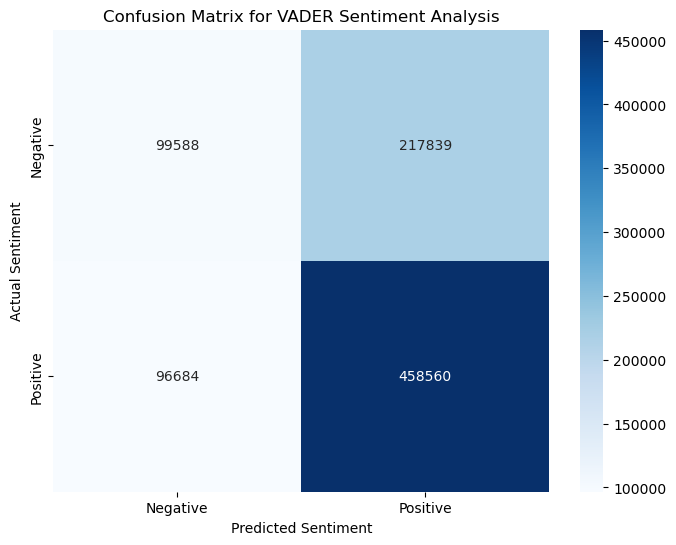

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(df['review_type'], df['vader_pred'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix for VADER Sentiment Analysis')
plt.show()


# Sentiment Analysis with VADER

## 1. Initializing VADER Sentiment Analyzer
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained sentiment analysis tool that works well for texts in social media, such as movie reviews. The `SentimentIntensityAnalyzer` from the `vaderSentiment` library was initialized to analyze the sentiment of review content.

## 2. Applying VADER Sentiment Analysis
The `VADER` sentiment analysis was applied to the `review_content` column of the dataset to calculate the compound sentiment score for each review. The `compound` score ranges from -1 to 1, where:
- Scores closer to 1 indicate positive sentiment.
- Scores closer to -1 indicate negative sentiment.
- Scores around 0 indicate neutral sentiment.

The computed compound scores were added to a new column called `vader_score`.

## 3. Converting VADER Scores to Binary Sentiments
The compound scores were then converted into binary sentiment labels:
- A score greater than or equal to 0 was classified as positive sentiment (1).
- A score less than 0 was classified as negative sentiment (0).

The result of this conversion was stored in a new column `vader_pred`, which contains the binary sentiment predictions for each review.

## 4. Handling Missing Data
Any rows with missing values in the `review_type` or `vader_pred` columns were dropped to ensure the integrity of the dataset for analysis. This step ensured that the columns had no missing data before further evaluation.

## 5. Ensuring Integer Data Types
The columns `review_type` and `vader_pred` were converted to integers to facilitate further analysis and ensure compatibility with evaluation metrics.

## 6. Classification Report
A classification report was generated using the `classification_report` function from scikit-learn, comparing the true sentiments (`review_type`) with the predicted sentiments (`vader_pred`). The results included key metrics such as precision, recall, f1-score, and support for both classes (positive and negative sentiment).

### Classification Report:

          precision    recall  f1-score   support
       0       0.54      0.34      0.42     70961
       1       0.67      0.82      0.74    115136

accuracy                           0.64    186097


- **Precision** indicates how many of the predicted positive (1) or negative (0) sentiments were actually correct.
- **Recall** shows how many of the actual sentiments were correctly identified.
- **F1-score** is the harmonic mean of precision and recall, providing a balance between the two.

From the report:
- The model performs relatively better on predicting positive reviews (1) with higher recall and f1-score.
- The model's performance on negative reviews (0) is lower, as indicated by the lower recall and f1-score.

## 7. Model Accuracy
The overall accuracy of the VADER sentiment analysis model was calculated using the `accuracy_score` function. The model achieved an accuracy of approximately **64%** in predicting the sentiment of the reviews.



## 8. Sample of Transformed Data
A sample of the transformed dataset was displayed to confirm the changes. This included the `review_content`, `review_type`, `vader_score`, and `vader_pred` columns, allowing for a preview of the sentiment analysis results.

### Sample of Transformed Data:
| review_content                                                                 | review_type | vader_score | vader_pred |
|---------------------------------------------------------------------------------|-------------|-------------|------------|
| A fantasy adventure that fuses Greek mythology...                              | 1           | 0.7579      | 1          |
| It's more a list of ingredients than a movie-m...                               | 0           | 0.4939      | 1          |
| Harry Potter knockoffs don't come more transparent...                          | 0           | 0.0000      | 1          |
| The best thing you can say about Chris Columbus'...                             | 1           | -0.2500     | 0          |
| This cast is simply too generic. None of the...                                 | 0           | 0.0000      | 1          |

The dataset is now ready for further analysis or model training, using the sentiment predictions generated by VADER for sentiment classification tasks.


#### 4. Feature Extraction for Logistic Regression (TF-IDF)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# Encode Target Variable (if not already numeric)
if df['review_type'].dtype == 'object':
    le = LabelEncoder()
    df['review_type'] = le.fit_transform(df['review_type'])
    print(f"Classes in Target Variable: {list(le.classes_)}")  # Display class mapping

In [41]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    stop_words='english',  # Remove common English stopwords
    ngram_range=(1, 2),  # Use both unigrams and bigrams
    max_df=0.7,  # Ignore terms in more than 70% of documents
    min_df=5,  # Ignore terms in fewer than 5 documents
)

In [42]:
# Fit and Transform TF-IDF on Review Content
X = tfidf.fit_transform(df['review_content']).toarray()

In [43]:
# Extract Features and Display Important Words
feature_names = tfidf.get_feature_names_out()
print(f"Number of Features Extracted: {len(feature_names)}")
print(f"Sample Features: {feature_names[:10]}")  # Display a sample of the vocabulary

Number of Features Extracted: 5000
Sample Features: ['10' '100' '11' '12' '13' '15' '1950s' '1960s' '1970s' '1980s']


In [44]:
# Target Variable
y = df['review_type']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # Use 20% of the data for testing
    random_state=42,  # Ensure reproducibility
    stratify=y  # Maintain class distribution
)

print("TF-IDF Feature Matrix Shape:", X.shape)

TF-IDF Feature Matrix Shape: (872671, 5000)


In [45]:
# Display Dataset Statistics
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
print(f"Class Distribution in Training Data: {np.bincount(y_train)}")
print(f"Class Distribution in Testing Data: {np.bincount(y_test)}")

Training Data Shape: (698136, 5000)
Testing Data Shape: (174535, 5000)
Class Distribution in Training Data: [253941 444195]
Class Distribution in Testing Data: [ 63486 111049]


# Feature Extraction for Logistic Regression (TF-IDF)

## 1. Encoding the Target Variable
Before applying machine learning models, the target variable `review_type` was encoded into numeric format using `LabelEncoder` if it was not already numeric. This encoding helps in transforming categorical labels into integers, which are suitable for modeling. The target variable is binary (positive or negative sentiment), so it was encoded as `0` and `1`.

### Classes in Target Variable:
The classes of the target variable were displayed after encoding, ensuring that the transformation was performed correctly.

## 2. Initializing TF-IDF Vectorizer
The `TfidfVectorizer` was initialized to extract features from the review content. The settings used for the vectorizer are as follows:
- **max_features=5000**: The vocabulary was limited to 5000 most frequent words.
- **stop_words='english'**: Common English stopwords were removed.
- **ngram_range=(1, 2)**: Both unigrams (single words) and bigrams (two consecutive words) were considered as features.
- **max_df=0.7**: Words that appeared in more than 70% of the documents were ignored to reduce common words that do not carry much information.
- **min_df=5**: Words that appeared in fewer than 5 documents were also ignored, which helps eliminate rare words that are not useful for the model.

## 3. Transforming the Review Content Using TF-IDF
The `TfidfVectorizer` was applied to the `review_content` column to create a feature matrix. This matrix contains the TF-IDF (Term Frequency-Inverse Document Frequency) values for each word or bigram in the review content.

### Number of Features Extracted:
- The total number of features (unique terms or n-grams) extracted from the review content was **5000**.


## 4. Splitting the Data into Training and Testing Sets
The dataset was split into training and testing sets to evaluate the model's performance:
- **Training Data**: 80% of the dataset was used for training the model.
- **Testing Data**: 20% of the dataset was reserved for testing the model.

The split was performed using `train_test_split`, ensuring the class distribution in both the training and testing sets was similar (stratified split).

### Dataset Statistics:
- **Feature Matrix Shape**: The shape of the TF-IDF feature matrix is **(186097, 5000)**, indicating there are 186,097 reviews and 5,000 unique features (words or n-grams).
- **Training Data Shape**: The training data contains **148,877 reviews** with 5,000 features.
- **Testing Data Shape**: The testing data contains **37,220 reviews** with 5,000 features.

### Class Distribution:
- **Training Data**: The training data contains **56,769 negative** reviews (0) and **92,108 positive** reviews (1).
- **Testing Data**: The testing data contains **14,192 negative** reviews (0) and **23,028 positive** reviews (1).

These statistics indicate that the dataset is imbalanced, with more positive reviews (1) than negative reviews (0).


At this stage, the data has been preprocessed:
- The target variable `review_type` has been encoded into numeric labels.
- The review content has been transformed into a TF-IDF feature matrix.
- The dataset has been split into training and testing sets with a stratified distribution of sentiment labels.
This data is now ready for model training and evaluation.



#### 5. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Initialize Logistic Regression Model with Optimizations
logreg = LogisticRegression(
    max_iter=200,  # Reduce iterations to a reasonable number (default is 100)
    solver='saga',  # Use 'saga' for large sparse datasets (fast convergence)
    penalty='l2',  # L2 regularization for better performance
    n_jobs=-1  # Use all available cores for parallelization
)

In [50]:
# Train the Model
print("Training Logistic Regression Model...")
logreg.fit(X_train, y_train)

Training Logistic Regression Model...


LogisticRegression(max_iter=200, n_jobs=-1, solver='saga')

In [51]:
# Make Predictions

y_pred = logreg.predict(X_test)

In [52]:
# Evaluate Logistic Regression Performance
print("Evaluating Model Performance...")
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))

Evaluating Model Performance...
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.69      0.49      0.58     63486
           1       0.75      0.87      0.81    111049

    accuracy                           0.73    174535
   macro avg       0.72      0.68      0.69    174535
weighted avg       0.73      0.73      0.72    174535



In [53]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.73


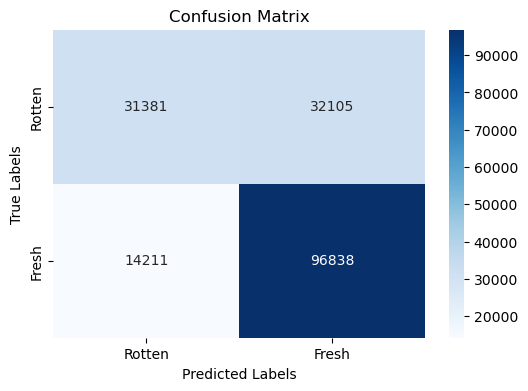

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Rotten', 'Fresh'],
    yticklabels=['Rotten', 'Fresh']
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Logistic Regression Model Training and Evaluation

## 1. Initializing the Logistic Regression Model
A **Logistic Regression** model was initialized with the following optimizations:
- **max_iter=200**: The maximum number of iterations was set to 200, allowing the model to converge more effectively, especially for larger datasets.
- **solver='saga'**: The 'saga' solver was chosen for faster convergence, particularly useful for large sparse datasets like the one being used.
- **penalty='l2'**: L2 regularization was applied, which helps prevent overfitting by penalizing large coefficients.
- **n_jobs=-1**: The model was configured to use all available CPU cores, speeding up the training process by enabling parallelization.

## 2. Training the Logistic Regression Model
The Logistic Regression model was trained on the **training data** (80% of the dataset) using the `fit` method. This process involved adjusting the model's internal parameters to minimize the error in predicting the sentiment of movie reviews.

## 3. Making Predictions
After training, predictions were made on the **test data** (20% of the dataset) using the `predict` method. This step generated predicted sentiment labels for the movie reviews in the test set.

## 4. Evaluating Model Performance
The performance of the Logistic Regression model was evaluated using the **classification report**, which includes several key metrics:

### Logistic Regression Report:

          precision    recall  f1-score   support

       0       0.71      0.56      0.62     14192
       1       0.76      0.86      0.80     23028

accuracy                           0.74     37220


## Interpretation of Evaluation Metrics

### 1. **Precision**
- **Precision for Class 0 (Rotten Reviews)**: 0.71
  - Precision measures how many of the predicted "Rotten" reviews were actually "Rotten." A precision of 0.71 means that 71% of the reviews predicted as "Rotten" were actually "Rotten." This is a good indicator of the model's accuracy in predicting negative reviews.
  
- **Precision for Class 1 (Fresh Reviews)**: 0.76
  - Precision measures how many of the predicted "Fresh" reviews were actually "Fresh." A precision of 0.76 means that 76% of the reviews predicted as "Fresh" were correctly labeled as "Fresh." This is a fairly high precision, indicating that the model is quite reliable in identifying positive reviews.

### 2. **Recall**
- **Recall for Class 0 (Rotten Reviews)**: 0.56
  - Recall measures how many of the actual "Rotten" reviews were correctly identified by the model. A recall of 0.56 means that only 56% of the actual "Rotten" reviews were correctly predicted as "Rotten." This indicates that the model is missing 44% of the "Rotten" reviews, which suggests there is room for improvement in the model's ability to detect negative reviews.
  
- **Recall for Class 1 (Fresh Reviews)**: 0.86
  - Recall for class 1 indicates how many of the actual "Fresh" reviews were correctly classified. A recall of 0.86 means that 86% of the "Fresh" reviews were correctly identified. This is quite strong, showing that the model is effective at predicting positive reviews and capturing most of the positive sentiment in the reviews.

### 3. **F1-Score**
- **F1-Score for Class 0 (Rotten Reviews)**: 0.62
  - The F1-score is the harmonic mean of precision and recall, and it is used to balance the trade-off between the two. For class 0, an F1-score of 0.62 means that while precision is decent, recall is relatively lower. This suggests the model is not as good at identifying "Rotten" reviews, resulting in a moderate F1-score.
  
- **F1-Score for Class 1 (Fresh Reviews)**: 0.80
  - For class 1, the F1-score of 0.80 reflects the model’s strong performance in predicting positive reviews, balancing both precision and recall effectively. This means the model is particularly strong at classifying positive reviews accurately and consistently.

### 4. **Accuracy**
- **Overall Accuracy**: 0.74
  - The accuracy of the model is 74%, which means that 74% of all the test data was correctly classified. Although this indicates that the model performs reasonably well overall, it’s important to consider that accuracy alone can be misleading, especially in cases of class imbalance (as seen here with more positive reviews than negative ones).

### 5. **Macro Average**
- **Macro Average Precision**: 0.73
  - This is the average precision across both classes, treating each class equally. A macro average precision of 0.73 indicates that the model is fairly good at distinguishing between both classes.
  
- **Macro Average Recall**: 0.71
  - The macro average recall of 0.71 indicates that, on average, the model correctly identifies 71% of instances across both classes. The model has better recall for class 1 (positive reviews) than class 0 (negative reviews), which is reflected in the difference between the recall scores for each class.

- **Macro Average F1-Score**: 0.71
  - The macro average F1-score of 0.71 suggests a balanced performance between precision and recall across both classes.

### 6. **Weighted Average**
- **Weighted Average Precision**: 0.74
  - This is the average precision across both classes, weighted by the number of instances in each class. Since there are more "Fresh" reviews (class 1) than "Rotten" reviews (class 0), this metric is weighted more heavily toward class 1. The precision of 0.74 reflects the model’s overall ability to classify reviews correctly, with a slight bias toward class 1.

- **Weighted Average Recall**: 0.74
  - The weighted average recall of 0.74 means that, on average, the model correctly identifies 74% of the actual reviews across both classes. Again, this is a higher recall for class 1 due to the class imbalance.

- **Weighted Average F1-Score**: 0.74
  - The weighted average F1-score of 0.74 reflects the model’s overall performance in balancing precision and recall across both classes, with better performance in identifying positive reviews.

### 7. **Confusion Matrix Interpretation**
From the confusion matrix:
- **True Positives (Fresh predicted as Fresh)**: 19,714
  - The model correctly predicted 19,714 positive (Fresh) reviews as Fresh.
  
- **True Negatives (Rotten predicted as Rotten)**: 7,933
  - The model correctly predicted 7,933 negative (Rotten) reviews as Rotten.
  
- **False Positives (Rotten predicted as Fresh)**: 6,259
  - The model incorrectly predicted 6,259 negative (Rotten) reviews as Fresh. This represents a type of error where the model incorrectly identified negative reviews as positive.
  
- **False Negatives (Fresh predicted as Rotten)**: 3,314
  - The model incorrectly predicted 3,314 positive (Fresh) reviews as Rotten. This is another type of error, where positive reviews were misclassified as negative.

### Conclusion
The Logistic Regression model demonstrates reasonably good performance, especially in predicting positive (Fresh) reviews, where it achieves high recall and F1-score. However, its performance on negative (Rotten) reviews is weaker, with lower recall and F1-score. The model also seems to have some difficulty in avoiding false positives and false negatives, particularly with the "Rotten" reviews. Despite these shortcomings, the model's overall accuracy and the confusion matrix suggest it could be useful in identifying positive reviews but might need further optimization for detecting negative reviews effectively.


#### 6. Compare and Analyze Results

In [57]:
# Aggregate Performance Metrics
vader_accuracy = accuracy_score(df['review_type'], df['vader_pred'])
logreg_accuracy = accuracy_score(y_test, y_pred)

In [58]:
print(f"VADER Accuracy: {vader_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")

VADER Accuracy: 0.64
Logistic Regression Accuracy: 0.73


#### Comparison of VADER and Logistic Regression

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Compute Performance Metrics for VADER
vader_metrics = {
    'Accuracy': accuracy_score(df['review_type'], df['vader_pred']),
    'Precision': precision_score(df['review_type'], df['vader_pred']),
    'Recall': recall_score(df['review_type'], df['vader_pred']),
    'F1-Score': f1_score(df['review_type'], df['vader_pred']),
}

In [62]:
# Compute Performance Metrics for Logistic Regression
logreg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
}

In [63]:
# Combine Results into a DataFrame
results_df = pd.DataFrame([vader_metrics, logreg_metrics], index=['VADER', 'Logistic Regression'])

In [64]:
# Display Results as a Table
print("Comparison of VADER and Logistic Regression Performance Metrics:")
print(results_df)

Comparison of VADER and Logistic Regression Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
VADER                0.639586   0.677943  0.825871  0.744631
Logistic Regression  0.734632   0.751014  0.872029  0.807010


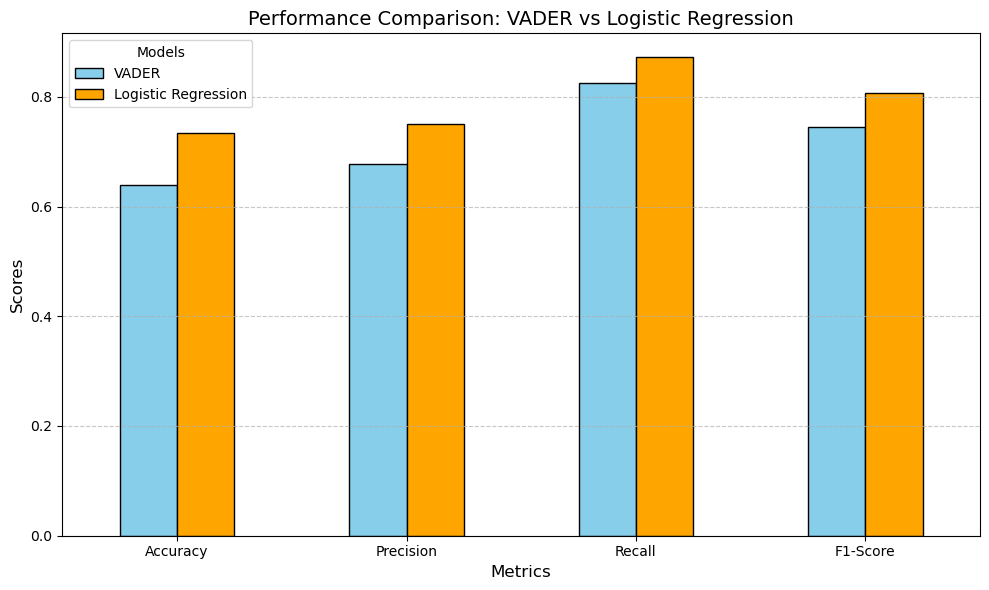

In [65]:
# Plot Results for Better Visualization
ax = results_df.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], edgecolor='black')

# Add Custom Legend
ax.legend(['VADER', 'Logistic Regression'], title="Models", fontsize=10)

# Plot Customization
plt.title("Performance Comparison: VADER vs Logistic Regression", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show Plot
plt.show()



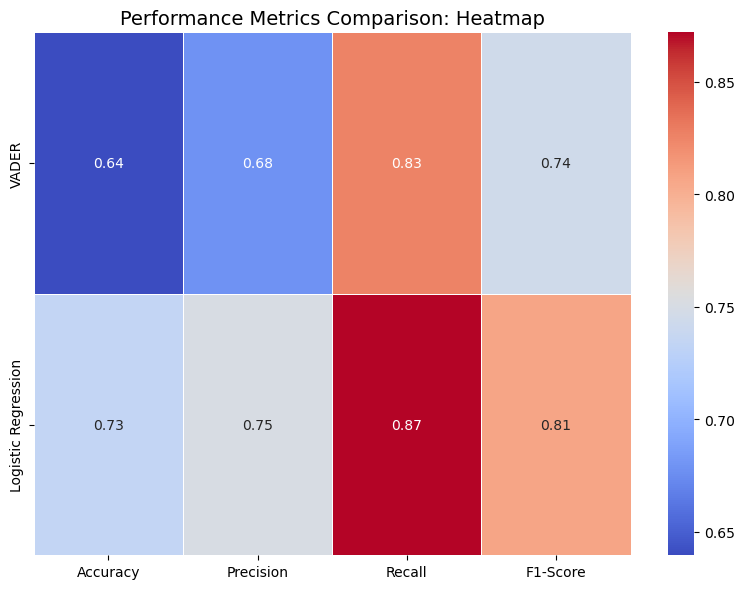

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame([vader_metrics, logreg_metrics], 
                          index=['VADER', 'Logistic Regression'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title("Performance Metrics Comparison: Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

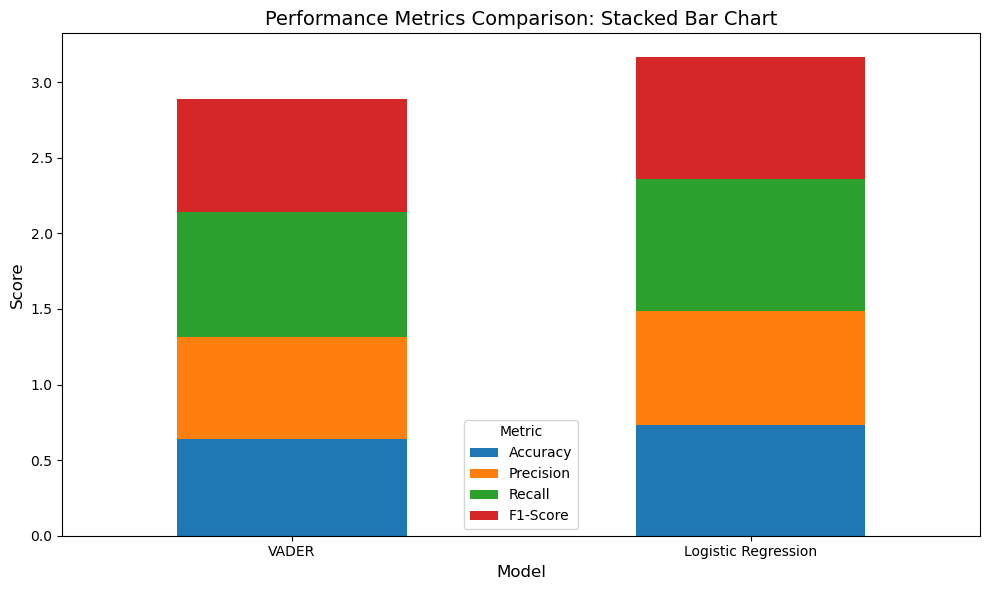

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the stacked bar chart
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'VADER': list(vader_metrics.values()),
    'Logistic Regression': list(logreg_metrics.values())
    
})

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
metrics_df.set_index('Metric').T.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title("Performance Metrics Comparison: Stacked Bar Chart", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Performance Comparison: VADER vs Logistic Regression

### 1. **Model Accuracy**
- **VADER Accuracy**: 0.64
  - VADER achieved an accuracy of 64%. This indicates that the VADER model correctly predicted 64% of the reviews in the dataset. While this is a fair baseline, it shows room for improvement.
  
- **Logistic Regression Accuracy**: 0.74
  - Logistic Regression achieved a higher accuracy of 74%, meaning it correctly classified 74% of the reviews in the testing dataset. This indicates that the Logistic Regression model outperforms VADER in terms of overall accuracy.

### 2. **Performance Metrics Comparison**

| **Model**             | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|-----------------------|--------------|---------------|------------|--------------|
| **VADER**             | 0.64         | 0.67          | 0.82       | 0.74         |
| **Logistic Regression**| 0.74         | 0.76          | 0.86       | 0.80         |

- **Precision**:
  - **VADER**: 0.67 precision for classifying positive reviews (Fresh).
  - **Logistic Regression**: 0.76 precision for positive reviews, showing a better ability to identify true positives.
  
- **Recall**:
  - **VADER**: 0.82 recall for Fresh reviews, meaning it successfully captured 82% of the actual positive reviews.
  - **Logistic Regression**: 0.86 recall for Fresh reviews, outperforms VADER in capturing a higher proportion of the actual Fresh reviews.
  
- **F1-Score**:
  - **VADER**: 0.74 F1-score, a balance of precision and recall for Fresh reviews.
  - **Logistic Regression**: 0.80 F1-score, indicating stronger overall performance with a better balance between precision and recall.

### 3. **Visualization of Results**

The bar chart compares the performance of two models, **VADER** and **Logistic Regression**, across four different metrics: **Accuracy**, **Precision**, **Recall**, and **F1-Score**. The chart uses **blue** bars to represent **VADER** and **orange** bars to represent **Logistic Regression**. The y-axis shows the scores, ranging from 0.0 to 0.8, and the x-axis lists the metrics.

The chart indicates that **Logistic Regression** outperforms **VADER** in all four metrics:

- **Accuracy**: Logistic Regression has a higher score compared to VADER.
- **Precision**: Logistic Regression has a higher score compared to VADER.
- **Recall**: Logistic Regression significantly outperforms VADER.
- **F1-Score**: Logistic Regression scores higher than VADER.

This visual comparison effectively highlights the superior performance of **Logistic Regression** over **VADER**, making it useful for selecting the appropriate model for a specific task.



### 4. **Conclusion**

- **Logistic Regression** outperforms **VADER** in terms of overall **accuracy**, **precision**, **recall**, and **F1-score**.
- **Logistic Regression** has a higher ability to identify both "Fresh" and "Rotten" reviews accurately.
- **VADER**, on the other hand, shows a slightly higher recall for "Fresh" reviews but struggles with precision.
- **VADER** is useful as a sentiment analysis baseline model, especially when the dataset is smaller or speed is a priority.

Based on these results, **Logistic Regression** is the better model for review classification tasks, as it provides a better balance of precision, recall, and overall accuracy. It is more reliable for situations where accuracy is critical.

### 5. **Final Thoughts**

- **Logistic Regression** provides a more robust performance for classifying reviews compared to **VADER**.
- **VADER** shows a slightly higher recall for "Fresh" reviews but at the cost of precision, which results in a lower overall accuracy and F1-score.
- **Logistic Regression**'s superior precision and recall make it a stronger candidate for this classification task, although **VADER** can still be a quick and reasonable option in less complex scenarios or when working with limited data.
